# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease ?

## 2. Data

Usually, client or the company provides the data but for this demo we'll download it from [UCI Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/heart+disease) or [Kaggle](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

The original data came from the Cleavland data from the UCI Machine Learning Repository. 

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create Data Dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0 = no disease, 1 = disease



# Preparing the tools

We're using Python libraries like Pandas, NumPy, Matplotlib for this notebook. So we need to import it first,

In [1]:
# Data Modelling and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want to plot the figures inline
%matplotlib inline


# Experimenting different Models/Estimators of Classifications
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluating models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

# Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become the subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# explore the data for a very first time
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# What type of data do we have ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# checking the label / target variable
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

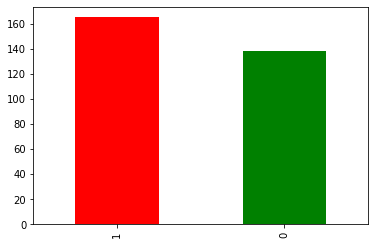

In [16]:
# visualizing it
df["target"].value_counts().plot(kind="bar", color=["red", "green"]);

In [17]:
# do we have missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
# some more common analytics about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Age and Heart Rate

In [71]:
# using crosstab for comparison
pd.crosstab(df.age, df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


In [32]:
# it looks too much of distributed information, but according to the data we have,
# I can see one pattern is that, we have most of the samples between age 40 and 60, who are heart disease patient.
df[(df["age"]>=40) & (df["age"]<=60)].age.value_counts().sum()

208

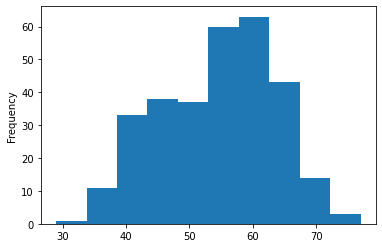

In [106]:
# checking the distribution of age column with the histogram
df.age.plot.hist();

**Note : When we check each feature, we should also visible see by plotting the data by histogram, it should be normal distribution like above. Suppose one of the sample have 150 of age or age of 5, those will be considered as Outliers and we must remove those data, because machine learning model won't able to detect the pattern in it**

**So to visualize age vs Heart Rate (thalach)**, we can use Scatter plot.

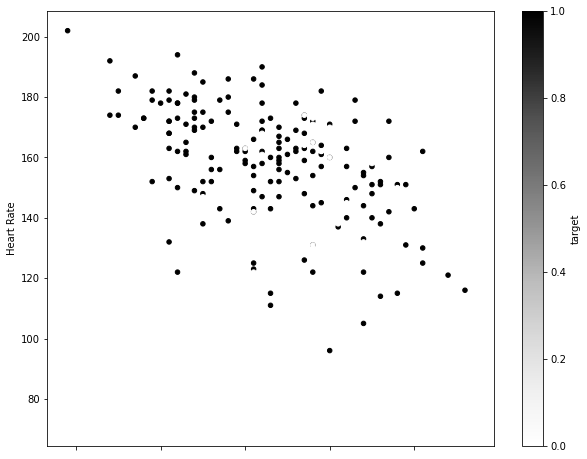

In [105]:
df.plot(kind="scatter", x="age", y="thalach", c="target", figsize=(10,8), ylabel="Heart Rate", xlabel="Age");

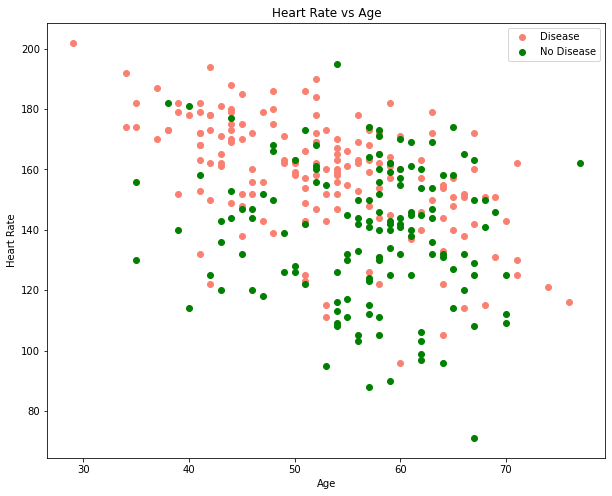

In [116]:
# another way to plot,
plt.figure(figsize=(10,8));

plt.scatter(x=df[df.target==1].age, 
            y=df[df.target==1].thalach,
            c="salmon");

plt.scatter(x=df[df.target==0].age, 
            y=df[df.target==0].thalach,
            c="green");

plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("Heart Rate vs Age")
plt.legend(["Disease","No Disease"]);


### Heart Disease Frequency according to Sex

In [72]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

So, here we can see we have almost 100(exacts is 96) samples of females and 200(exact is 207) samples of males.

In [73]:
# comparing them with our target variable
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


According to the data, by comparing, we observed that,
* 72 out of 96 females suffered from heart disease, meaning there is a 75% chance of having heart disease for female sex.
* 93 out of 207 males suffered from heart disease, meaning there is a 50% chance of having heart disease for male sex.

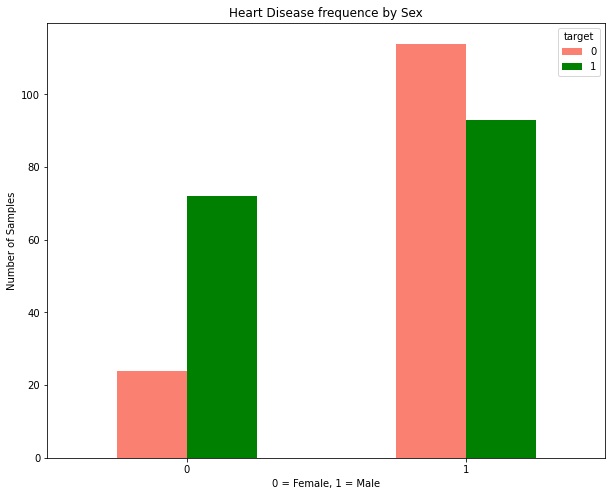

In [83]:
# let's visualize it
pd.crosstab(df.sex, df.target).plot(kind="bar", 
                                   figsize=(10,8),
                                   color = ["salmon","green"])

plt.title("Heart Disease frequence by Sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0);

### Heart Disease per Chest Pain (cp)

cp: chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic

In [118]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


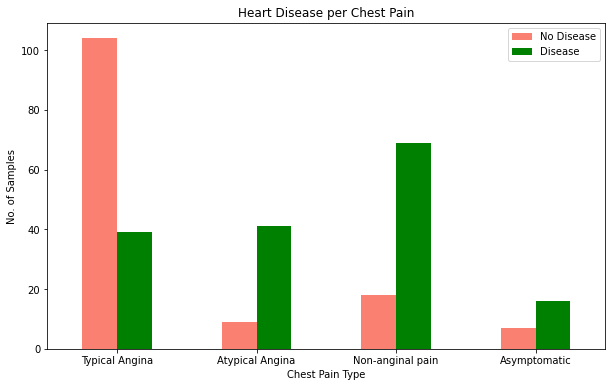

In [121]:
pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "green"]);

plt.xlabel("Chest Pain Type")
plt.ylabel("No. of Samples")
plt.title("Heart Disease per Chest Pain")
plt.legend(["No Disease", "Disease"])
plt.xticks(ticks=[0,1,2,3], labels=["Typical Angina", "Atypical Angina", "Non-anginal pain","Asymptomatic"], rotation=0);


Another way to find relations and comparsion between features and targets is by plotting correlation matrix.

**Correlation Matrix** is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table.

In [122]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


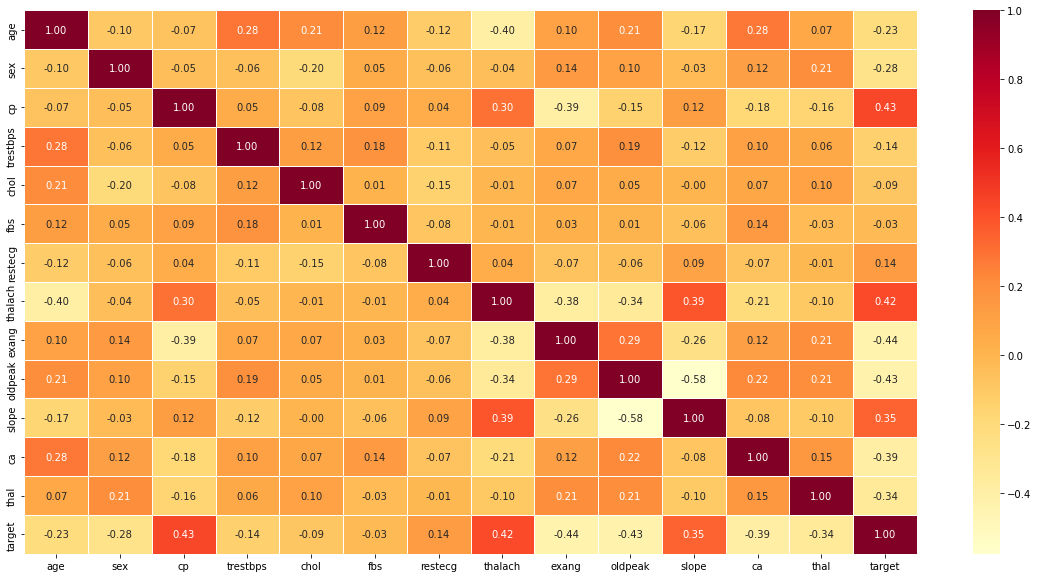

In [126]:
# by visualizing it would make more sense what's happening, so lets plot it
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(20,10))

ax = sns.heatmap(df_corr, annot=True, fmt='.2f',linewidths=0.5 , cmap="YlOrRd")


Here, in the seaborn heatmap we can see that darker the color, more the correlation between each other. 

Notice the diagonals, having 1.00 as value, it says for example, sex column in y-axis is heavily correlated with sex column in x-axis which is correct.

Since, we are looking for the correlation between independent columns and dependent column(target), then we'll focus on last column.

See, we have 3 variable which are heavily correlated to target, **slope=0.35, thalach=0.42, cp = 0.43**.

It says, whether a patient have heart disease or not, is highly dependent on these 3 variables.

And in the other side, features like **exang=-0.44, ca=-0.39, oldpeak=-0.43** are not too much telling the story about whether the person is having heart disease or not.

# 5. Modelling

In [3]:
# now we can choose the model/estimator for our problem

# first split the data in X & y

X = df.drop("target", axis = 1)
y = df["target"]

# train and test splits

np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

and then we'll test it (use the patterns) on the training set.


We're going to try 3 different machine learning models:

1. Logistic Regression
2. RandomForest Classifier
3. K-Nearest Neighbours



### Step 1: Create the baseline scores of each model

In [7]:
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function will fit each model through the training and test set data
    and returns the default evaluation score metrics.
    Takes models, X_train, X_test, y_train and y_test as input.
    """
    # dictionary of model scores
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores        

In [10]:
model_baseline_scores = fit_and_score(models, 
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_baseline_scores

/Users/starlord/Desktop/Work/Learn/DataScience/heart-disease-ml-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7540983606557377,
 'Random Forest': 0.7049180327868853,
 'KNN': 0.5573770491803278}

### Model Comparison

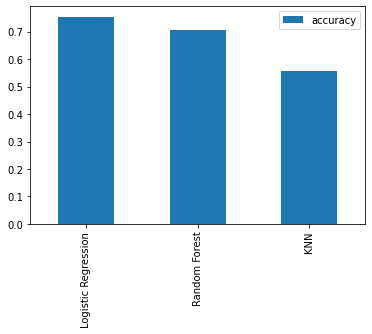

In [11]:
model_baseline_scores_df= pd.DataFrame(model_baseline_scores, index=["accuracy"])

model_baseline_scores_df.T.plot.bar();

Here is the model comparison of baseline scores returned by each model with the training and test set.

After comparing it, we can see that Logistic Regression and Random Forest perform pretty well.

But, as we set our target in the beginning that if our model accuracy should reach 95% then only it'll be considered for the production project.

Also keep in mind, **Model's first predictions aren't always what we should based our next steps off.**

Let's tune it then.

### Step 2: Tuning/Improving our models

We can experiment our model with following tuning parameters and plots:
* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hand)

In [13]:
# Tuning KNN model first

# There is a hyperparameter called k_neighbors, default value is 5.
# Let's try with random numbers and evaluate the score of the model

np.random.seed(7)

n_neighbors = range(1,21)

# creating empty train and test score to store the scores with random n_neighbors
train_scores = []
test_scores = []


knn = KNeighborsClassifier()

for i in n_neighbors:
    
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(X_train, y_train)
    
    # train scores
    train_scores.append(knn.score(X_train, y_train))
    
    # test scores
    test_scores.append(knn.score(X_test, y_test))

In [19]:
train_scores

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339]

In [18]:
test_scores

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836]

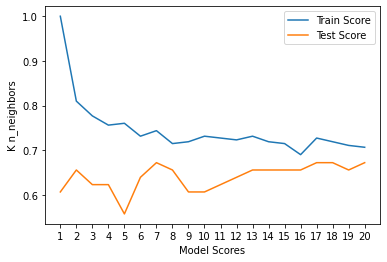

In [43]:
# let's visualize it

plt.plot(n_neighbors, train_scores, label = "Train Score")
plt.plot(n_neighbors, test_scores, label = "Test Score")

plt.xticks(np.arange(1,21,1))
plt.xlabel("Model Scores")
plt.ylabel("K n_neighbors")
plt.legend();

In [44]:
baseline_KNN = round((model_baseline_scores.get("KNN")*100),2)

print(f"Baseline KNN Scores : {baseline_KNN}%")
print(f"Maximum KNN score on Train set: {max(test_scores)*100:.2f}%")

Baseline KNN Scores : 55.74%
Maximum KNN score on Train set: 67.21%


Even after tuning with only single hyperparameter we get 67% accuracy which is good compared to the baseline scores, but not enough, so let's discard KNN model for this experiment and continue with other two.

Also, it's very lengthy process to tune with each every hyperparamter individually evaluate the score, we have **RandomizedSearchCV** and **GridSearchCV** which will be helpful for such cases.

### Hyperparameter Tuning using RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [ ]:
# create a hyperparameter grid for LogisticRegression

log_reg_grid = { "penalty" : [],
                "C": 
    
          }